# Livrable 1 - Classification binaire

In [247]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split



In [248]:
# Chemin vers ton dataset
data_dir = r"..\..\..\DataSets\clean_dataset"


In [249]:
# Fonction pour compter le nombre d'images dans un dossier
def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

painting_path = os.path.join(data_dir, 'image', 'Painting')
schematics_path = os.path.join(data_dir, 'image', 'Schematics')
sketch_path = os.path.join(data_dir, 'image', 'Sketch')
text_path = os.path.join(data_dir, 'image', 'text')
photo_path = os.path.join(data_dir, 'Photo')

num_paintings = count_images_in_folder(painting_path)
num_schematics = count_images_in_folder(schematics_path)
num_sketches = count_images_in_folder(sketch_path)
num_text = count_images_in_folder(text_path)
num_photos = count_images_in_folder(photo_path)

print(f"Paintings: {num_paintings}, Schematics: {num_schematics}, Sketches: {num_sketches}, Text: {num_text}, Photos: {num_photos}")


Paintings: 794, Schematics: 4261, Sketches: 613, Text: 4329, Photos: 9997


In [250]:
# Paramètres de base
input_shape = (128, 128, 3)  # Format d'image
batch_size = 32
epochs = 10
learning_rate = 0.00093888  # Meilleur taux d'apprentissage trouvé

In [251]:
# Charger le jeu de données d'entraînement
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 80% d'entraînement, 20% de validation
    subset="training",  # Sous-ensemble d'entraînement
    seed=42,  # Pour reproduire les résultats
    image_size=(128, 128),  # Taille des images redimensionnées
    batch_size=batch_size  # Taille des batchs
)

Found 19994 files belonging to 2 classes.
Using 15996 files for training.


In [252]:
# Charger le jeu de données de validation
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 80% d'entraînement, 20% de validation
    subset="validation",  # Sous-ensemble de validation
    seed=42,  # Pour reproduire les résultats
    image_size=(128, 128),  # Taille des images redimensionnées
    batch_size=batch_size  # Taille des batchs
)

Found 19994 files belonging to 2 classes.
Using 3998 files for validation.


## Rescale (normalisation)

Le paramètre rescale=1./255 normalise les valeurs des pixels de l'image en les divisant par 255. Cela signifie que les valeurs des pixels, qui sont normalement dans la plage de 0 à 255 (puisque les images sont généralement encodées en 8 bits), sont mises à l'échelle pour être comprises entre 0 et 1.

et aussi un réechantillonage en focntion des poids des classe

In [222]:
'''datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # Fraction de données réservée à la validation
    horizontal_flip=True,
    zoom_range=0.2
)'''



## Split des données


In [223]:
'''# Définir les chemins des datasets
train_data = datagen.flow_from_directory(
    dataset_dir,  # Remplacer par le chemin vers ton dataset
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_dir,  # Remplacer par le chemin vers ton dataset
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)'''

Found 15996 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.


In [224]:
'''# Calcul des poids des classes pour compenser le déséquilibre
y_train = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)
print(train_generator.class_indices) '''

Class Weights: {0: 1.0, 1: 1.0}
{'Image': 0, 'Photo': 1}


Dans notre cas, le déséquilibre entre "Image" et "Photo" est modéré (ce que semble indiquer nos poids de classe), nous allons commencer avec l'utilisation des poids de classe. C'est une solution simple et efficace dans la plupart des cas, surtout si l'écart entre les classes n'est pas trop important.

Sinon après analyse des performances, si nous constatons que la classe minoritaire n'est toujours pas bien apprise, nous pouvez alors envisager d'ajouter un rééchantillonnage pour cette classe en appliquant des techniques de data augmentation sur les images de la classe "Image".
redimensionnement et orientation différente de s image (ex 18 degres, ect.. workshop 2)


### Création du modèle CNN 

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.8735 - loss: 0.4152 - val_accuracy: 0.8577 - val_loss: 0.2971 - learning_rate: 5.0000e-04
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.9214 - loss: 0.2098 - val_accuracy: 0.9152 - val_loss: 0.2157 - learning_rate: 5.0000e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.9267 - loss: 0.1936 - val_accuracy: 0.9187 - val_loss: 0.2964 - learning_rate: 5.0000e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.9338 - loss: 0.1691 - val_accuracy: 0.9317 - val_loss: 0.1881 - learning_rate: 5.0000e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.9436 - loss: 0.1456 - val_accuracy: 0.9277 - val_loss: 0.2284 - learning_rate: 5.0000e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.9434 - loss: 0.1483 - val_accuracy: 0.8919 - val_loss: 0.2676 - learning_rate: 5.0000e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - acc

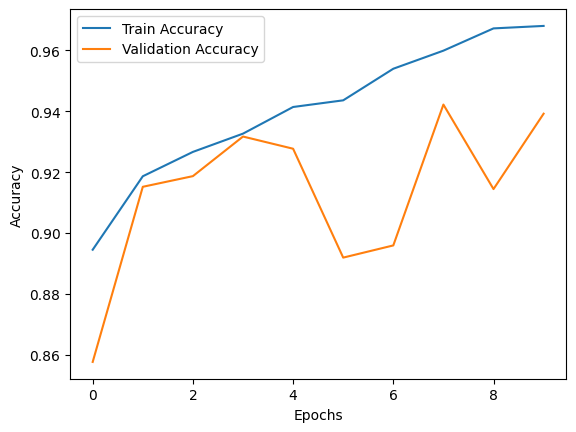

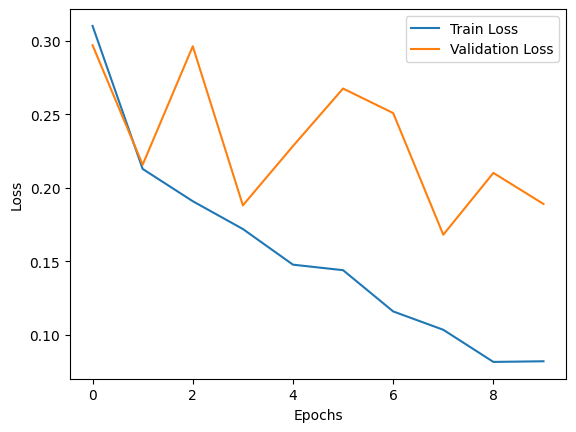

In [253]:
# Création du modèle CNN optimisé
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entraînement du modèle avec callbacks
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') > 1.5 or logs.get('val_accuracy') < 0.5:
            print(f"Anomalie détectée à l'époch {epoch + 1}, arrêt de l'entraînement.")
            self.model.stop_training = True

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-6),
        CustomCallback()
    ]
)

# Visualisation des résultats/Performance du modèle
def plot_training(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    


plot_training(history)

## Sauvegarde des poids

In [243]:
model.save_weights('model.random6.weights.h5')

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fonction de prédiction avec probabilités
def predict_image_binary_with_probabilities(model_save, image_path):
    img = load_img(image_path, target_size=(128, 128))  # Adapter la taille à celle du modèle
    img_array = img_to_array(img)  # Conversion en tableau numpy
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension batch
    img_array /= 255.0  # Normalisation de l'image

    # Prédiction binaire (probabilité unique)
    predictions = model_save.predict(img_array)
    probability = predictions[0][0]  # Probabilité que l'image soit une "Photo"
    
    # Classification basée sur la probabilité
    if probability > 0.7:
        predicted_class = 'Photo'
    else:
        predicted_class = 'Not-Photo'  # "Image" comme Not-Photo dans ce cas

    # Retourner la classe prédite et les probabilités (classe photo et non-photo)
    return predicted_class, [probability, 1 - probability]

# Fonction d'affichage des images avec probabilités
def display_images_with_binary_probabilities(model_save, dataset_dir, num_images=6):
    subfolders = ['Painting', 'Schematics', 'Sketch', 'Text']  # Liste des sous-dossiers d'images
    folder = ["Image","photo"]
    fig, axes = plt.subplots(2, num_images//2, figsize=(18, 8))  # Créer une grille pour afficher les images

    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']  # Extensions d'images valides

    for i in range(num_images):
        randomfolder = random.choice(folder) 
        if randomfolder == "photo":
             image_folder = os.path.join(dataset_dir, randomfolder) 
        else:
            subfolder = random.choice(subfolders)
            image_folder = os.path.join(dataset_dir, randomfolder, subfolder)  

        # Vérifier l'existence du sous-dossier
        if not os.path.exists(image_folder):
            print(f"Folder not found: {image_folder}")
            continue
        
        try:
            # Fichiers valides dans le sous-dossier
            valid_files = [f for f in os.listdir(image_folder) if os.path.splitext(f)[1].lower() in valid_extensions]
            
            if len(valid_files) == 0:
                print(f"No valid image files found in: {image_folder}")
                continue

            random_image = random.choice(valid_files)
            image_path = os.path.join(image_folder, random_image)

            # Charger l'image et obtenir la prédiction
            img = load_img(image_path, target_size=(256, 256))  # Pour une meilleure visibilité
            predicted_class, probabilities = predict_image_binary_with_probabilities(model_save, image_path)

            # Sélectionner l'emplacement dans la grille (axes)
            ax = axes[i // (num_images // 2), i % (num_images // 2)]
            ax.imshow(img)
            ax.axis('off')

            # Afficher la classe prédite et le pourcentage
            probability_photo = probabilities[0] * 100  # Probabilité que ce soit une "Photo"
            ax.set_title(f'Predicted Class: {predicted_class} ({probability_photo:.2f}%)', fontsize=12)

        except Exception as e:
            print(f"An error occurred: {e}")
            ax.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center', fontsize=14)
            ax.axis('off')
            continue

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
An error occurred: index 2 is out of bounds for axis 0 with size 2


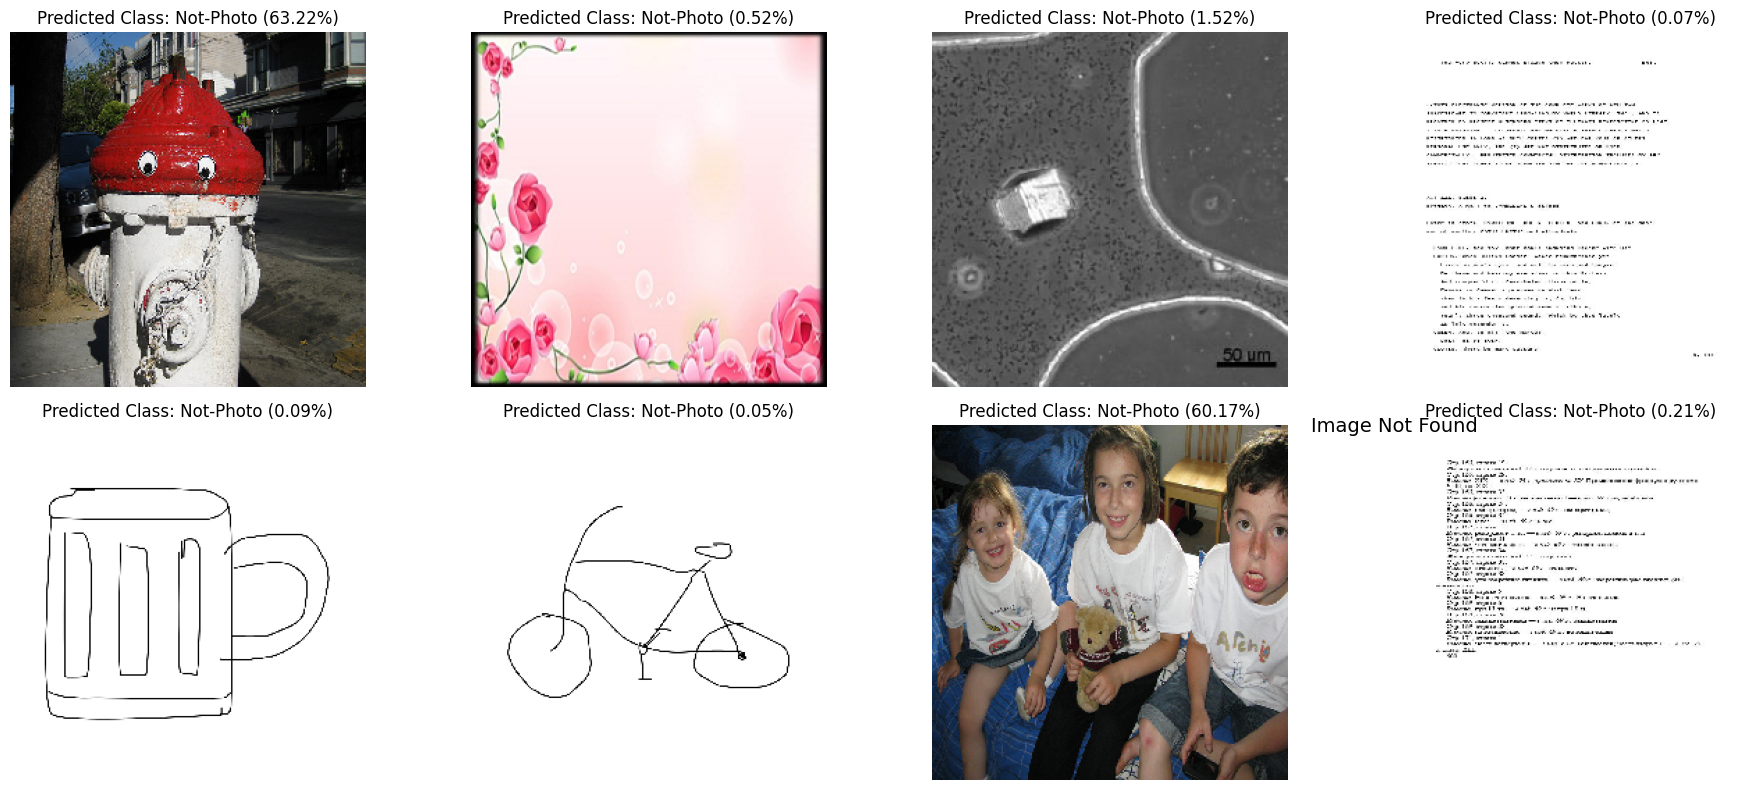

In [138]:
display_images_with_binary_probabilities(model, dataset_dir, num_images=9)

# Utilisation des Poids Sauvegarder


In [ ]:
model_save_weights = Sequential()

In [ ]:
model_save_weights.add(layers.Rescaling(1./255, input_shape=(128, 128, 3)))
model_save_weights.add(Conv2D(32, (3, 3), activation='relu'))
model_save_weights.add(MaxPooling2D(pool_size=(2, 2)))

model_save_weights.add(Conv2D(64, (3, 3), activation='relu'))
model_save_weights.add(MaxPooling2D(pool_size=(2, 2)))

model_save_weights.add(Conv2D(128, (3, 3), activation='relu'))
model_save_weights.add(MaxPooling2D(pool_size=(2, 2)))

model_save_weights.add(Flatten())
model_save_weights.add(Dense(128, activation='relu'))
model_save_weights.add(Dropout(0.4)) 
model_save_weights .add(Dense(64, activation='relu'))


model_save_weights.add(Dense(1, activation='sigmoid'))

In [ ]:
model_save_weights.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_save_weights.load_weights('model.weights.h5')

In [ ]:
display_images_with_binary_probabilities(model_save_weights, dataset_dir, num_images=10)